## Nome: Anedino dos Santos

Imports necessários

In [5]:
import pandas as pd
import numpy as np
import math
import statistics
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
import missingno as msno
warnings.filterwarnings("ignore")

Colocando a base de dados em memória

In [ ]:
dados = pd.read_csv('Anedino_dos_Santos.csv', sep=';', encoding='UTF-8')

# Exercício 1 - Dados perdidos

    a) Quantos missings totais possui sua base de dados?
    b) Quantas variáveis apresentaram valores perdidos?
    c) Mostre em algum das visões que aprendemos com o missingno
    d) Qual será o tratamento dado para os dados perdidos e por quê?

In [7]:
# primeira obaservação
dados.head()

,nome,motor,zero_km,acessórios,ano,quilometragem,valor
0,Jetta Variant,Motor 4.0 Turbo,False,"['Rodas de liga', 'Travas elétricas', 'Piloto ...",2003.000000,44410.0,88078.640625
1,Passat,Motor Diesel,False,"['Central multimídia', 'Teto panorâmico', 'Fre...",1991.000000,5712.0,106161.937500
2,Crossfox,Motor Diesel V8,False,"['Piloto automático', 'Controle de estabilidad...",1990.000000,37123.0,NaN
3,DS5,Motor 2.4 Turbo,True,"['Travas elétricas', '4 X 4', 'Vidros elétrico...",2019.000000,NaN,124549.070312
4,Aston Martin DB4,Motor 2.4 Turbo,False,"['Rodas de liga', '4 X 4', 'Central multimídia...",-3608.126738,25757.0,92612.101562


In [11]:
dados['motor'].value_counts()

Motor 3.0 32v            27
Motor Diesel             26
Motor V8                 26
Motor 4.0 Turbo          25
Motor 1.0 8v             25
Motor Diesel V8          21
Motor 5.0 V8 Bi-Turbo    21
Motor Diesel V6          21
Motor V6                 20
Motor 1.8 16v            18
Motor 2.0 16v            18
Motor 2.4 Turbo          10
Name: motor, dtype: int64

,nome,motor,zero_km,acessórios,ano,quilometragem,valor
0,Jetta Variant,Motor 4.0 Turbo,False,"['Rodas de liga', 'Travas elétricas', 'Piloto ...",2003.000000,44410.0,88078.640625
1,Passat,Motor Diesel,False,"['Central multimídia', 'Teto panorâmico', 'Fre...",1991.000000,5712.0,106161.937500
2,Crossfox,Motor Diesel V8,False,"['Piloto automático', 'Controle de estabilidad...",1990.000000,37123.0,NaN
4,Aston Martin DB4,Motor 2.4 Turbo,False,"['Rodas de liga', '4 X 4', 'Central multimídia...",-3608.126738,25757.0,92612.101562
5,Palio Weekend,Motor 1.8 16v,False,"['Sensor de estacionamento', 'Teto panorâmico'...",2012.000000,10728.0,97497.726562
...,...,...,...,...,...,...,...
253,Phantom 2013,Motor V8,False,"['Controle de estabilidade', 'Piloto automátic...",2014.000000,27505.0,51759.578125
254,Cadillac Ciel concept,Motor V8,False,"['Bancos de couro', 'Painel digital', 'Sensor ...",1991.000000,29981.0,51667.058594
255,Classe GLK,Motor 5.0 V8 Bi-Turbo,False,"['Rodas de liga', 'Controle de tração', 'Câmbi...",2002.000000,52637.0,68934.031250
256,Aston Martin DB5,Motor Diesel,False,"['Ar condicionado', '4 X 4', 'Câmbio automátic...",-547.531504,7685.0,122110.898438


In [4]:
dados.isnull().sum()

nome              0
motor             0
zero_km           0
acessórios        0
ano               0
quilometragem    88
valor            34
dtype: int64

Resposta 1 - Minha base de dados possui 122 dados missing, sendo 88 para a variável quilometragem e 34 para a variáve valor.

Resposta 2 - Apenas duas variáveis apresentam dados perdidos: quilometragem e valor.

Resposta 3 - Segue visão dos dados perdidos pelo missingno:

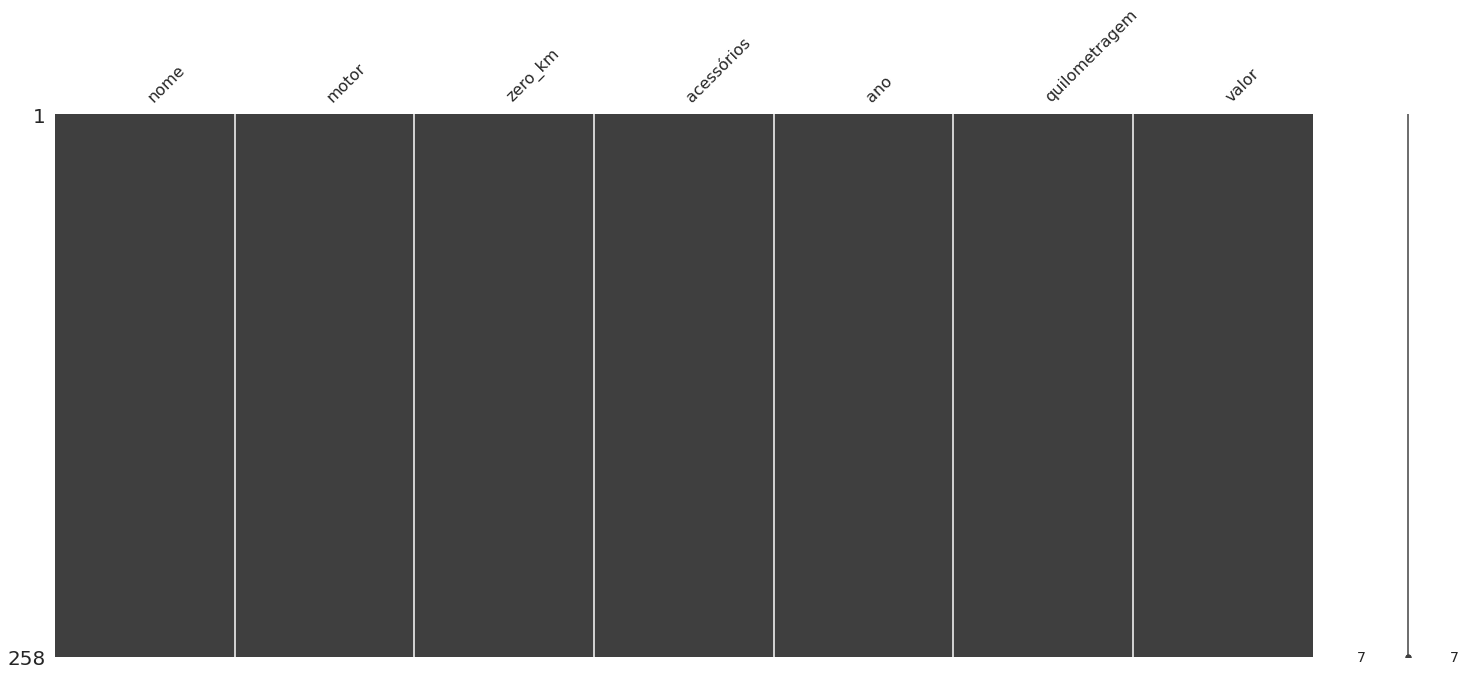

In [71]:
msno.matrix(dados)

Resposta 4 -
- Variavel Quilometragem -
para tratar a variável de Quilometragem irei zerar todos os valores. Ela é uma Missing At Random, ou seja, ela depende da variável zero_km que quando está True a quilometragem está como NaN.
- Variavel Valor -
Para o caso da variável Valor interpretei que é um Missing Not At Random. Provavelmente houve algum erro de coleta ou algo parecido. Para tratar irei por no lugar a mediada.

In [70]:
# Colocando zero na Variável quilometragem
dados['quilometragem'].fillna(value=0, inplace=True)

# colocando a mediana na Variável Valor
mediana = dados['valor'].median()
dados['valor'].fillna(value=mediana, inplace=True)

# Exercício 2 - Outliers

    1) Mostre um gráfico de caixa de cada variável numérica
    2) Qual tratamento você dará para os outliers e por quê?

In [58]:
# para tratar o ano eu defini que tudo que está acima de 2019 seja tratado como
# 2020 e tudo que está abaixo de 1997 seja tratado como 1990
dados.loc[dados.ano > 2019, 'ano'] = 2020
dados.loc[dados.ano < 1997, 'ano'] = 1990
px.box(dados, x='ano')

In [50]:
px.box(dados, x='quilometragem')

In [52]:
px.box(dados, x='valor')

# Exercício 3 - Medidas resumo

    1) Para as variáveis numéricas, mostre: 
        a) média
        b) mediana
        c) percentis 25 e 75
        d) mínimo e máximo
    2) Para as variáveis categoricas, retorne a frequência delas

In [80]:
#Média, mediana, percentis
# Ano
media_ano = dados['ano'].mean()
mediana_ano = dados['ano'].median()

array_ano = np.array(dados['ano'], dtype=int)
Q1 = np.percentile(array_ano,25)
Q3 = np.percentile(array_ano,75)
print(f"Média do ano: {media_ano}; Mediana do ano: {mediana_ano}; Percentíl 25: {Q1}; Percentíl 75: {Q3}")
print('-'*30)

#Média, mediana, percentis
# Quilometragem
media_quilometragem = dados['quilometragem'].mean()
mediana_quilometragem = dados['quilometragem'].median()

array_quilometragem = np.array(dados['quilometragem'], dtype=int)
Q1 = np.percentile(array_quilometragem,25)
Q3 = np.percentile(array_quilometragem,75)
print(f"Média da quilometragem: {media_quilometragem}; Mediana da quilometragem: {mediana_quilometragem}; Percentíl 25: {Q1}; Percentíl 75: {Q3}")
print('-'*30)

#Média, mediana, percentis
# Valor
media_valor = dados['valor'].mean()
mediana_valor = dados['valor'].median()

array_valor = np.array(dados['valor'], dtype=int)
Q1 = np.percentile(array_valor, 25)
Q3 = np.percentile(array_valor, 75)
print(f"Média do valor: {media_valor}; Mediana da quilometragem: {mediana_valor}; Percentíl 25: {Q1}; Percentíl 75: {Q3}")


Média do ano: 2006.7519379844962; Mediana do ano: 2008.5; Percentíl 25: 1997.0; Percentíl 75: 2019.0
------------------------------
Média da quilometragem: 38939.410852713176; Mediana da quilometragem: 26378.0; Percentíl 25: 0.0; Percentíl 75: 76234.0
------------------------------
Média do valor: 99002.32179626937; Mediana da quilometragem: 97393.953125; Percentíl 25: 73510.0; Percentíl 75: 122852.5


In [85]:
# Frequência das variáveis categóricas
# Nome e Motor


KeyError: ignored

# Exercício 4 - Visualizações gráficas

    Com variáveis de sua escolha:

    1) Faça um histograma
    2) Faça um gráfico de dispersão
    3) Faça um gráfico de barras
    4) Faça um gráfico de linha

    Porém, faça para diferentes variáveis.